In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import datasets
from sklearn.manifold import TSNE
from datagen import BatchGenerator
from convlstm_autoencoder import ConvLSTMAutoEncoder

Using TensorFlow backend.


In [12]:
bg = BatchGenerator(video_path="./data/latent", img_size=(48,48), batch_size=1000)

X_latent, _ = bg.__getitem__(1)
y_label = bg.__getlabel__(1)

print(X_latent.shape)
print(y_label.shape)

(1000, 50, 48, 48, 3)
(1000,)


In [13]:
X_latent = X_latent.reshape(int(X_latent.shape[0]), -1)
print(X_latent.shape)

(1000, 345600)


In [14]:
tsne = TSNE(n_components=2, random_state=0)
X_plot = tsne.fit_transform(X_latent)

print(X_plot.shape)

(1000, 2)


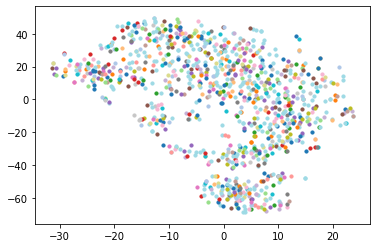

In [22]:
cmap = plt.get_cmap("tab20") 

for i in range(int(X_latent.shape[0])):
    plt.scatter(X_plot[i,0], X_plot[i,1], s=10, color=cmap(y_label[i]))

### 元の動画

In [35]:
bg = BatchGenerator(video_path="./data/video/20bn-jester-v1", img_size=(48,48), batch_size=1000)

X_ori, _ = bg.__getitem__(1)
y_label = bg.__getlabel__(1)

print(X_ori.shape)
print(y_label.shape)

(1000, 50, 48, 48, 3)
(1000,)


In [36]:
X_ori = X_ori.reshape(int(X_ori.shape[0]), -1)
print(X_ori.shape)

(1000, 345600)


In [37]:
tsne = TSNE(n_components=2, random_state=0)
X_plot = tsne.fit_transform(X_ori)

print(X_plot.shape)

(1000, 2)


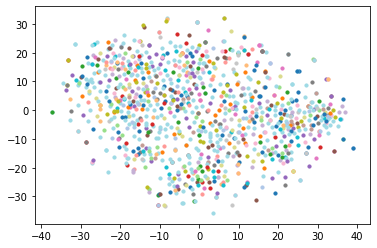

In [38]:
cmap = plt.get_cmap("tab20") 

for i in range(int(X_latent.shape[0])):
    plt.scatter(X_plot[i,0], X_plot[i,1], s=10, color=cmap(y_label[i]))